In [67]:
import numpy as np

In [68]:
h = 0.1
tau = 0.01
x = np.arange(0, 100+h, h)
t = np.arange(0, 1, tau)
c = 50
def mu1(t):
    return 0
def mu2(x):
    return [1/(1 + ((t-20)/10)**10) for t in x]
def f(t, x):
    return 0

In [69]:
%matplotlib notebook

In [70]:
u = np.zeros((len(t), len(x)))
for i in range(len(t)):
    u[i][0] = mu1(t)
u[0] = mu2(x)

## Составная схема

In [71]:
for i in range(1, len(t)):
    for j in range(1, len(x)):
        tau = t[i] - t[i-1]
        h = x[j] - x[j-1]
        k = c * tau / h 
        if k<=1:
            u[i][j] = f(t[i] + tau/2, x[j] - tau/2)*tau \
                      - c * (u[i-1][j-1] - u[i-1][j-2])*tau/h \
                      + u[i-1][j]
        else:
            u[i][j] = (f(t[i] + tau/2, x[j] - tau/2)*h \
                      - (u[i-1][j] - u[i-1][j-1])*h/tau + c * u[i-1][j])/c

<IPython.core.display.Javascript object>


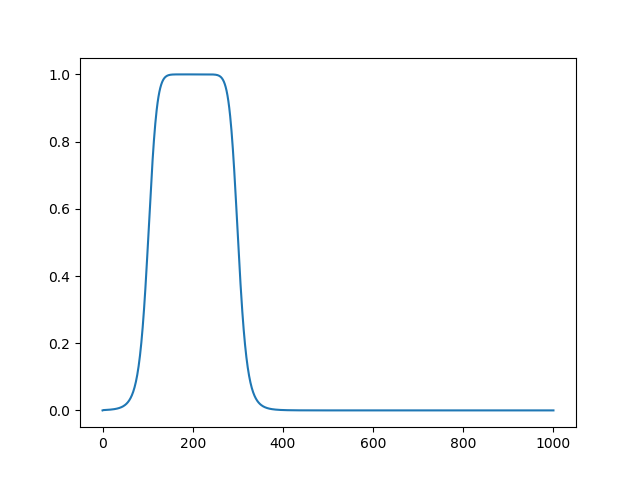

In [72]:
plt.plot(u[4])